# Analyzing ROMS Output
In this notebook, we analyze some output from ROMS.

In [1]:
from roms_tools import Grid, ROMSOutput

For our analysis, we require information about the grid used in the model. We retrieve the grid data using the `Grid.from_file ` method.

In [2]:
grid = Grid.from_file(
    "/global/cfs/cdirs/m4746/Users/elizabeth/EASTPAC25KM/INPUT_FIXED_TOPO/epac25km_grd.nc"
)

WARNING - Vertical coordinates (Cs_r, Cs_w) not found in grid file.
INFO - === Preparing the vertical coordinate system using N = 100, theta_s = 5.0, theta_b = 2.0, hc = 300.0 ===
INFO - Total time: 0.003 seconds
INFO - ========================================================================================================


## Reading in ROMS output data

We can read three types of ROMS output data:
* `type = "restart"`: Restart files (files containing `rst` in the filename)
* `type = "average"`: Averaged model data (files containing `avg` in the filename)
* `type = "snapshot"`: Snapshots (files containing `his` in the filename)

For this example, we'll focus on restart files. Once the appropriate type of output data is selected, the `ROMSOutput` class can load the files based on the `path` parameter, which can be specified in one of the following ways:
1. `path` is a single file: loads a single specified file.
2. `path` is a list of files: loads the specified list of files.
3. `path` is a directory: automatically searches the directory for all matching output files and loads them.

### Reading a single restart file

In [3]:
%%time

roms_output_from_single_restart_file = ROMSOutput(
    grid=grid,
    path="/global/cfs/cdirs/m4746/Users/elizabeth/EASTPAC25KM_Jan1998/output_combined/eastpac25km_rst.19980106000000.nc",
    type="restart",
    use_dask=True,
)

CPU times: user 259 ms, sys: 87.9 ms, total: 346 ms
Wall time: 1.6 s


<div class="alert alert-info">

Note

In the cell above, we read our ROMS output files with `use_dask = True`. This enables `Dask`, a Python library designated to facilitate scalable, out-of-memory data processing by distributing computations across multiple threads or processes. [Here](https://roms-tools.readthedocs.io/en/latest/using_dask.html) you can learn more about using `Dask` with `ROMS-Tools`.

</div>

The `.ds` attribute contains an `xarray.Dataset` with the data that was read in. As you can see, the restart file contains two time stamps (10 minutes apart).

In [4]:
roms_output_from_single_restart_file.ds

<xarray.Dataset> Size: 1GB
Dimensions:                (time: 2, auxil: 6, eta_rho: 162, xi_rho: 122,
                            xi_u: 121, eta_v: 161, s_rho: 100)
Coordinates:
    abs_time               (time) datetime64[ns] 16B 1998-01-05T23:50:00 1998...
    lon_rho                (eta_rho, xi_rho) float64 158kB ...
    lat_rho                (eta_rho, xi_rho) float64 158kB ...
Dimensions without coordinates: time, auxil, eta_rho, xi_rho, xi_u, eta_v, s_rho
Data variables: (12/55)
    ocean_time             (time) float64 16B dask.array<chunksize=(2,), meta=np.ndarray>
    time_step              (time, auxil) int32 48B dask.array<chunksize=(1, 6), meta=np.ndarray>
    zeta                   (time, eta_rho, xi_rho) float64 316kB dask.array<chunksize=(1, 162, 122), meta=np.ndarray>
    ubar                   (time, eta_rho, xi_u) float64 314kB dask.array<chunksize=(1, 162, 121), meta=np.ndarray>
    vbar                   (time, eta_v, xi_rho) float64 314kB dask.array<chunksize=(1, 161, 122), meta=np.ndarray>
    MARBL_PH_3D            (time, s_rho, eta_rho, xi_rho) float64 32MB dask.array<chunksize=(1, 100, 162, 122), meta=np.ndarray>
    ...                     ...
    DV_avg_bak             (time, eta_v, xi_rho) float64 314kB dask.array<chunksize=(1, 161, 122), meta=np.ndarray>
    hbls                   (time, eta_rho, xi_rho) float64 316kB dask.array<chunksize=(1, 162, 122), meta=np.ndarray>
    hbbl                   (time, eta_rho, xi_rho) float64 316kB dask.array<chunksize=(1, 162, 122), meta=np.ndarray>
    u_slow                 (time, s_rho, eta_rho, xi_u) float64 31MB dask.array<chunksize=(1, 100, 162, 121), meta=np.ndarray>
    v_slow                 (time, s_rho, eta_v, xi_rho) float64 31MB dask.array<chunksize=(1, 100, 161, 122), meta=np.ndarray>
    p_slow                 (time, s_rho, eta_rho, xi_rho) float64 32MB dask.array<chunksize=(1, 100, 162, 122), meta=np.ndarray>
Attributes: (12/35)
    title:                 eastpac25km , 25km resolution
    grid_file:             /pscratch/sd/e/eay/EASTPAC25KM/INPUT_FIXED_TOPO/ep...
    init_file:             /pscratch/sd/e/eay/EASTPAC25KM_spinup/output/eastp...
    ntimes:                4610
    ndtfast:               45
    dt:                    600.0
    ...                    ...
    SRCS:                  SRCS $(shell ls *$(UPF77_ext)) SRCS : $(filter-out...
    CPPS:                  <cppdefs.opt> PACIFIC_PD SOLVE3D UV_ADV UV_COR ADV...
    surf_forcing_strings:  
    bc_options:             OBC_WEST, OBC_NORTH, OBC_SOUTH, OBC_M3ORLANSKI, O...
    git_version:           
    type:                  ROMS restart file

### Reading multiple restart files

In [5]:
%%time

roms_output_from_two_restart_files = ROMSOutput(
    grid=grid,
    path=[
        "/global/cfs/cdirs/m4746/Users/elizabeth/EASTPAC25KM_Jan1998/output_combined/eastpac25km_rst.19980106000000.nc",
        "/global/cfs/cdirs/m4746/Users/elizabeth/EASTPAC25KM_Jan1998/output_combined/eastpac25km_rst.20010201000000.nc",
    ],
    type="restart",
    use_dask=True,
)

CPU times: user 86.5 ms, sys: 7.88 ms, total: 94.3 ms
Wall time: 260 ms


The two specified restart files were concatenated into a single `xarray.Dataset`, which now contains 4 time stamps.

In [6]:
roms_output_from_two_restart_files.ds

<xarray.Dataset> Size: 3GB
Dimensions:                (time: 4, auxil: 6, eta_rho: 162, xi_rho: 122,
                            xi_u: 121, eta_v: 161, s_rho: 100)
Coordinates:
    abs_time               (time) datetime64[ns] 32B 1998-01-05T23:50:00 ... ...
    lon_rho                (eta_rho, xi_rho) float64 158kB ...
    lat_rho                (eta_rho, xi_rho) float64 158kB ...
Dimensions without coordinates: time, auxil, eta_rho, xi_rho, xi_u, eta_v, s_rho
Data variables: (12/55)
    ocean_time             (time) float64 32B dask.array<chunksize=(2,), meta=np.ndarray>
    time_step              (time, auxil) int32 96B dask.array<chunksize=(1, 6), meta=np.ndarray>
    zeta                   (time, eta_rho, xi_rho) float64 632kB dask.array<chunksize=(1, 162, 122), meta=np.ndarray>
    ubar                   (time, eta_rho, xi_u) float64 627kB dask.array<chunksize=(1, 162, 121), meta=np.ndarray>
    vbar                   (time, eta_v, xi_rho) float64 629kB dask.array<chunksize=(1, 161, 122), meta=np.ndarray>
    MARBL_PH_3D            (time, s_rho, eta_rho, xi_rho) float64 63MB dask.array<chunksize=(1, 100, 162, 122), meta=np.ndarray>
    ...                     ...
    DV_avg_bak             (time, eta_v, xi_rho) float64 629kB dask.array<chunksize=(1, 161, 122), meta=np.ndarray>
    hbls                   (time, eta_rho, xi_rho) float64 632kB dask.array<chunksize=(1, 162, 122), meta=np.ndarray>
    hbbl                   (time, eta_rho, xi_rho) float64 632kB dask.array<chunksize=(1, 162, 122), meta=np.ndarray>
    u_slow                 (time, s_rho, eta_rho, xi_u) float64 63MB dask.array<chunksize=(1, 100, 162, 121), meta=np.ndarray>
    v_slow                 (time, s_rho, eta_v, xi_rho) float64 63MB dask.array<chunksize=(1, 100, 161, 122), meta=np.ndarray>
    p_slow                 (time, s_rho, eta_rho, xi_rho) float64 63MB dask.array<chunksize=(1, 100, 162, 122), meta=np.ndarray>
Attributes: (12/35)
    title:                 eastpac25km , 25km resolution
    grid_file:             /pscratch/sd/e/eay/EASTPAC25KM/INPUT_FIXED_TOPO/ep...
    init_file:             /pscratch/sd/e/eay/EASTPAC25KM_spinup/output/eastp...
    ntimes:                4610
    ndtfast:               45
    dt:                    600.0
    ...                    ...
    SRCS:                  SRCS $(shell ls *$(UPF77_ext)) SRCS : $(filter-out...
    CPPS:                  <cppdefs.opt> PACIFIC_PD SOLVE3D UV_ADV UV_COR ADV...
    surf_forcing_strings:  
    bc_options:             OBC_WEST, OBC_NORTH, OBC_SOUTH, OBC_M3ORLANSKI, O...
    git_version:           
    type:                  ROMS restart file

### Reading all restart files in a directory

In [7]:
%%time

roms_output = ROMSOutput(
    grid=grid,
    path="/global/cfs/cdirs/m4746/Users/elizabeth/EASTPAC25KM_Jan1998/output_combined/",
    type="restart",
    use_dask=True,
)

CPU times: user 12.5 s, sys: 3.14 s, total: 15.6 s
Wall time: 1min 16s


The specified directory contains 222 restart files, all of which were concatenated into one dataset. (The concatenation takes some time, even though we used `use_dask = True`.)

In [8]:
roms_output.ds

<xarray.Dataset> Size: 288GB
Dimensions:                (time: 444, auxil: 6, eta_rho: 162, xi_rho: 122,
                            xi_u: 121, eta_v: 161, s_rho: 100)
Coordinates:
    abs_time               (time) datetime64[ns] 4kB 1998-01-05T23:50:00 ... ...
    lon_rho                (eta_rho, xi_rho) float64 158kB ...
    lat_rho                (eta_rho, xi_rho) float64 158kB ...
Dimensions without coordinates: time, auxil, eta_rho, xi_rho, xi_u, eta_v, s_rho
Data variables: (12/55)
    ocean_time             (time) float64 4kB dask.array<chunksize=(2,), meta=np.ndarray>
    time_step              (time, auxil) int32 11kB dask.array<chunksize=(1, 6), meta=np.ndarray>
    zeta                   (time, eta_rho, xi_rho) float64 70MB dask.array<chunksize=(1, 162, 122), meta=np.ndarray>
    ubar                   (time, eta_rho, xi_u) float64 70MB dask.array<chunksize=(1, 162, 121), meta=np.ndarray>
    vbar                   (time, eta_v, xi_rho) float64 70MB dask.array<chunksize=(1, 161, 122), meta=np.ndarray>
    MARBL_PH_3D            (time, s_rho, eta_rho, xi_rho) float64 7GB dask.array<chunksize=(1, 100, 162, 122), meta=np.ndarray>
    ...                     ...
    DV_avg_bak             (time, eta_v, xi_rho) float64 70MB dask.array<chunksize=(1, 161, 122), meta=np.ndarray>
    hbls                   (time, eta_rho, xi_rho) float64 70MB dask.array<chunksize=(1, 162, 122), meta=np.ndarray>
    hbbl                   (time, eta_rho, xi_rho) float64 70MB dask.array<chunksize=(1, 162, 122), meta=np.ndarray>
    u_slow                 (time, s_rho, eta_rho, xi_u) float64 7GB dask.array<chunksize=(1, 100, 162, 121), meta=np.ndarray>
    v_slow                 (time, s_rho, eta_v, xi_rho) float64 7GB dask.array<chunksize=(1, 100, 161, 122), meta=np.ndarray>
    p_slow                 (time, s_rho, eta_rho, xi_rho) float64 7GB dask.array<chunksize=(1, 100, 162, 122), meta=np.ndarray>
Attributes: (12/35)
    title:                 eastpac25km , 25km resolution
    grid_file:             /pscratch/sd/e/eay/EASTPAC25KM/INPUT_FIXED_TOPO/ep...
    init_file:             /pscratch/sd/e/eay/EASTPAC25KM_spinup/output/eastp...
    ntimes:                4610
    ndtfast:               45
    dt:                    600.0
    ...                    ...
    SRCS:                  SRCS $(shell ls *$(UPF77_ext)) SRCS : $(filter-out...
    CPPS:                  <cppdefs.opt> PACIFIC_PD SOLVE3D UV_ADV UV_COR ADV...
    surf_forcing_strings:  
    bc_options:             OBC_WEST, OBC_NORTH, OBC_SOUTH, OBC_M3ORLANSKI, O...
    git_version:           
    type:                  ROMS restart file

## Plotting ROMS output data
Next, we make some plots of our ROMS model output. We can plot horizontal or vertical slices.

[########################################] | 100% Completed | 101.17 ms


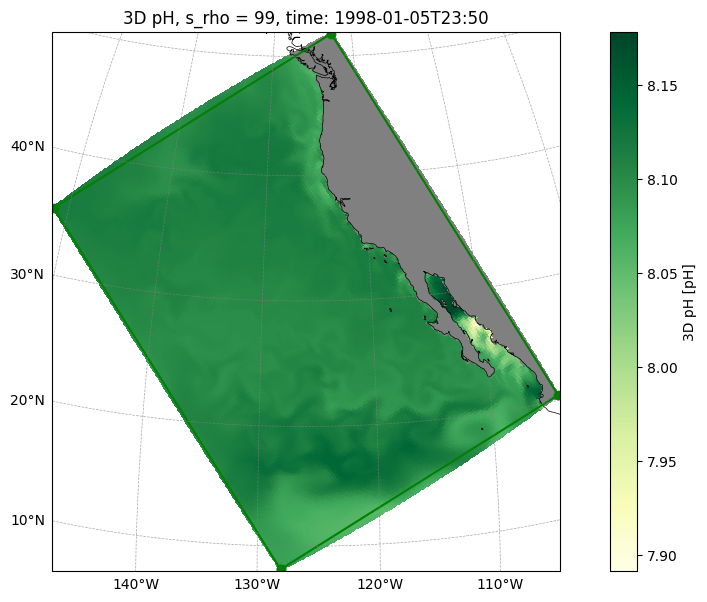

In [9]:
roms_output.plot(
    "MARBL_PH_3D", s=-1, time=0
)  # uppermost layer, first available time stamp

[########################################] | 100% Completed | 101.77 ms


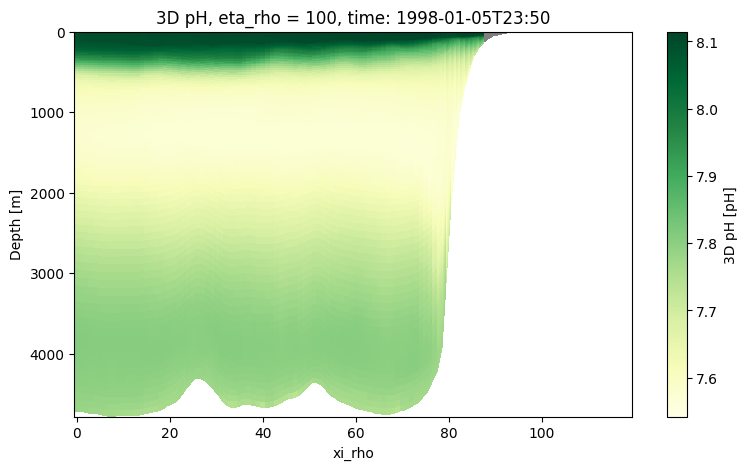

In [16]:
roms_output.plot("MARBL_PH_3D", eta=100, time=0)  # first available time stamp

[########################################] | 100% Completed | 202.44 ms


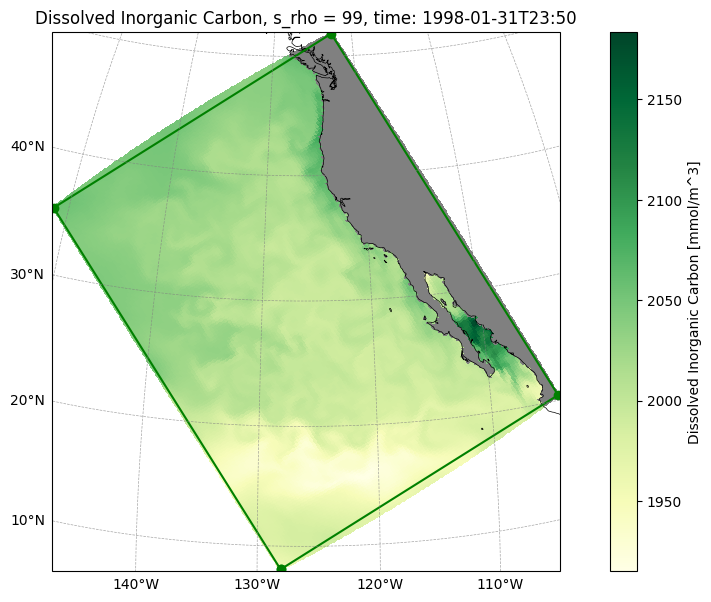

In [17]:
roms_output.plot("DIC", time=10, s=-1)  # uppermost layer, 10th available time stamp

[########################################] | 100% Completed | 102.88 ms


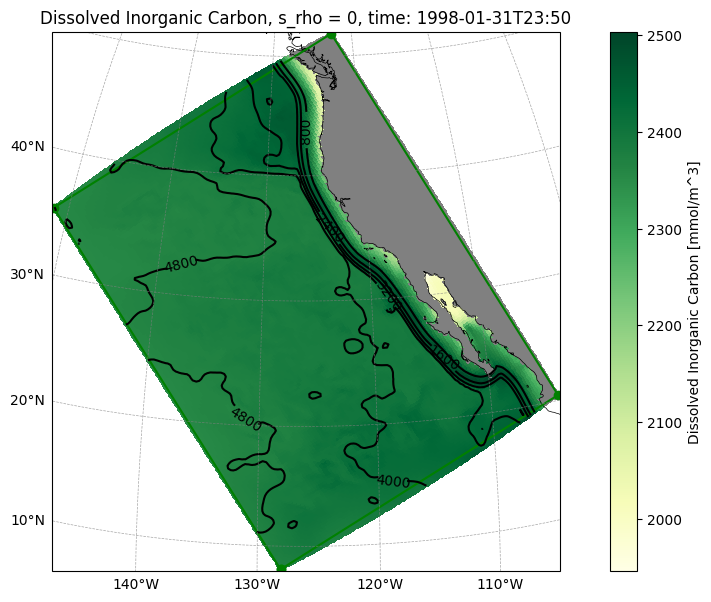

In [18]:
roms_output.plot(
    "DIC", time=10, s=0, depth_contours=True
)  # bottom layer, 10th available time stamp

[########################################] | 100% Completed | 101.55 ms


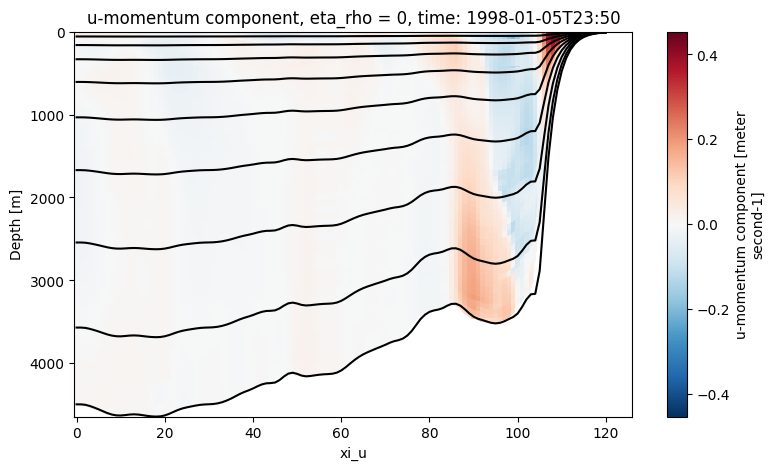

In [19]:
roms_output.plot("u", time=0, eta=0, layer_contours=True)

Or we can look at the depth profile of our favorite variable.

[########################################] | 100% Completed | 101.96 ms


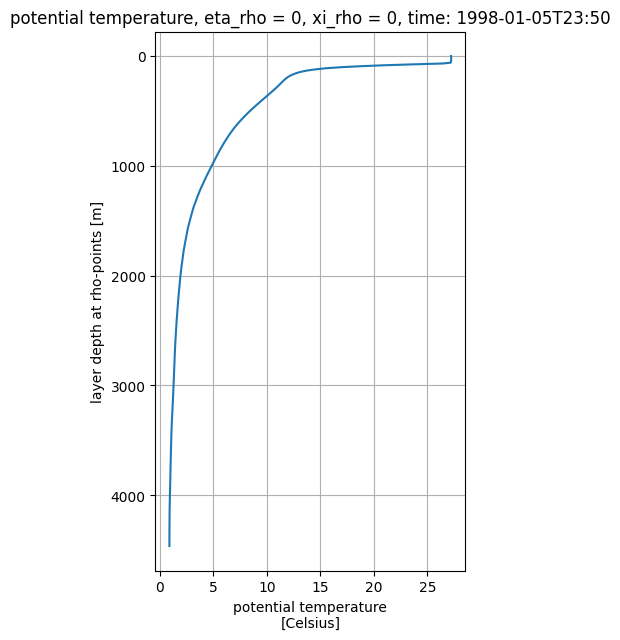

In [20]:
roms_output.plot("temp", time=0, xi=0, eta=0)

We can also plot the spatial variability of temperature (or any other variable) for a specified layer and eta (or xi) slice.

[########################################] | 100% Completed | 101.33 ms


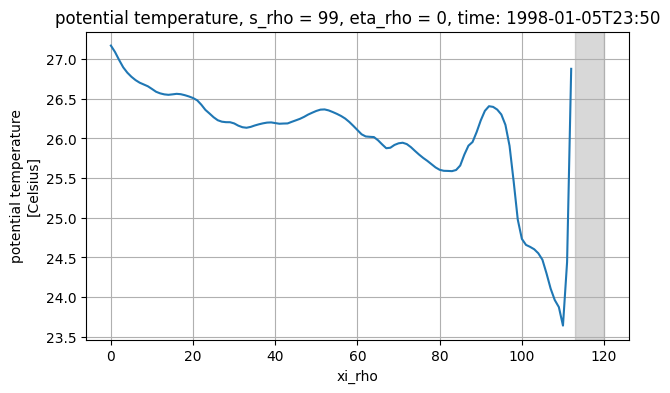

In [21]:
roms_output.plot("temp", time=0, s=-1, eta=0)